## Observations and Insights 

In [153]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergedMice = pd.merge(mouse_df, study_df, on ="Mouse ID", how = "inner")


# Display the data table for preview
mergedMice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [154]:
# Checking the number of mice.
mergedMice["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [155]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleanMice = mergedMice.drop_duplicates(subset=["Mouse ID","Timepoint"])
cleanMice.head(22)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [156]:
# Checking the number of mice in the clean DataFrame.
cleanMice["Mouse ID"].count()

1888

## Summary Statistics

In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

groupedMice = cleanMice.groupby(["Drug Regimen"])
meanMice = groupedMice["Tumor Volume (mm3)"].mean()
medianMice =groupedMice["Tumor Volume (mm3)"].median()
varianceMice =groupedMice["Tumor Volume (mm3)"].var()
stdMice =groupedMice["Tumor Volume (mm3)"].std()
semMice =groupedMice["Tumor Volume (mm3)"].sem()



In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
groupedMice = cleanMice.groupby(["Drug Regimen"])
aggMice = groupedMice["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

aggMice

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

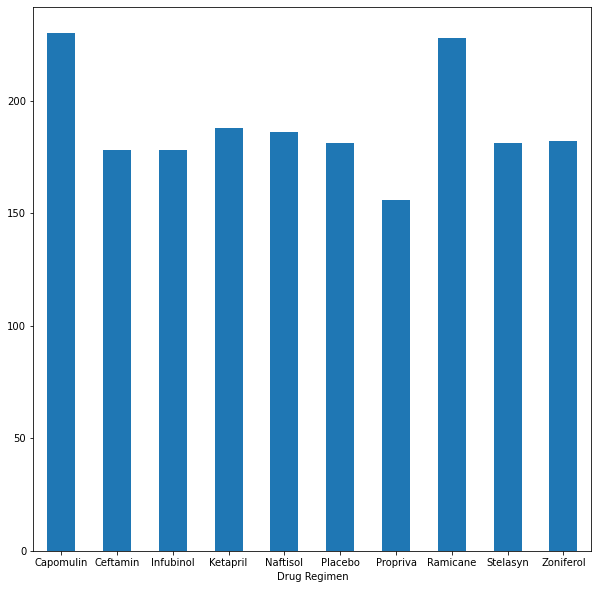

In [159]:
# Generate a bar plot showing the total number of 
#unique mice tested on each drug regimen using pandas.

totalMice = groupedMice["Mouse ID"].count()

totalMiceBar = totalMice.plot.bar(x="Drug", y ="Number of Mice", rot = 0,figsize=(10,10))
totalMiceBar

In [160]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



<AxesSubplot:ylabel='Sex'>

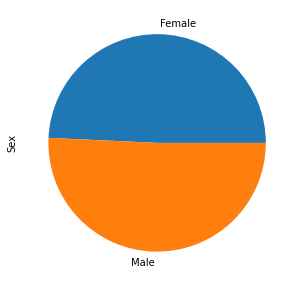

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

genderMice = cleanMice.groupby(["Sex"])
genderMice = genderMice["Mouse ID"].count()
genderMice = genderMice.rename("Sex")

totalMicePie = genderMice.plot.pie(y = "Sex", figsize=(5,5))
totalMicePie

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastMiceTime = cleanMice.loc[cleanMice["Timepoint"]== 45,:]
capDrugsRaw = lastMiceTime.loc[lastMiceTime["Drug Regimen"]=="Capomulin", :]
ramDrugsRaw =lastMiceTime.loc[lastMiceTime["Drug Regimen"]=="Ramicane", :]
infDrugsRaw = lastMiceTime.loc[lastMiceTime["Drug Regimen"]=="Infubinol", :]
cefDrugsRaw = lastMiceTime.loc[lastMiceTime["Drug Regimen"]=="Ceftamin", :]

fourDrugsMice = pd.concat([capDrugsRaw, ramDrugsRaw, infDrugsRaw, cefDrugsRaw])
   
fourDrugsMice
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#,"Ramicane","Infubinol"  "Ceftamin"

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [164]:
# Put treatments into a list for for loop (and later for plot labels)
capDrugsRaw = capDrugsRaw.sort_values("Tumor Volume (mm3)")
capDrugs = capDrugsRaw["Tumor Volume (mm3)"]
capDrugs = capDrugs.rename("Capomulin")

ramDrugsRaw=ramDrugsRaw.sort_values("Tumor Volume (mm3)")
ramDrugs = ramDrugsRaw["Tumor Volume (mm3)"]
ramDrugs = ramDrugs.rename("Ramicane")

infDrugsRaw=infDrugsRaw.sort_values("Tumor Volume (mm3)")
infDrugs = infDrugsRaw["Tumor Volume (mm3)"]
infDrugs = infDrugs.rename("Infubinol")

cefDrugsRaw=cefDrugsRaw.sort_values("Tumor Volume (mm3)")
cefDrugs = cefDrugsRaw["Tumor Volume (mm3)"]
cefDrugs = cefDrugs.rename("Ceftamin")


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds



    

In [165]:
quartilesCap = capDrugsRaw["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqCap = quartilesCap[0.25]
upperqCap = quartilesCap[0.75]
iqrCap = upperqCap - lowerqCap
lowerBoundCap = lowerqCap - (1.5*iqrCap)
upperBoundCap = upperqCap +(1.5*iqrCap)
outlierCap = capDrugsRaw.loc[(capDrugsRaw["Tumor Volume (mm3)"] < lowerBoundCap) | (capDrugsRaw["Tumor Volume (mm3)"] > upperBoundCap)]

quartilesRam = ramDrugsRaw["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqRam = quartilesRam[0.25]
upperqRam = quartilesRam[0.75]
iqrRam = upperqRam - lowerqRam
lowerBoundRam = lowerqRam - (1.5*iqrRam)
upperBoundRam = upperqRam +(1.5*iqrRam)
outlierRam = ramDrugsRaw.loc[(ramDrugsRaw["Tumor Volume (mm3)"] < lowerBoundRam) | (ramDrugsRaw["Tumor Volume (mm3)"] > upperBoundRam)]

quartilesInf = infDrugsRaw["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqInf = quartilesInf[0.25]
upperqInf = quartilesInf[0.75]
iqrInf = upperqInf - lowerqInf
lowerBoundInf = lowerqInf - (1.5*iqrInf)
upperBoundInf = upperqInf +(1.5*iqrInf)
outlierInf  = infDrugsRaw.loc[(infDrugsRaw["Tumor Volume (mm3)"] < lowerBoundInf ) | (infDrugsRaw["Tumor Volume (mm3)"] > upperBoundInf )]

quartilesCef = cefDrugsRaw["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerqCef = quartilesCef[0.25]
upperqCef = quartilesCef[0.75]
iqrCef = upperqCef - lowerqCef
lowerBoundCef = lowerqCef - (1.5*iqrCef)
upperBoundCef = upperqCef +(1.5*iqrCef)
outlierCef = cefDrugsRaw.loc[(cefDrugsRaw["Tumor Volume (mm3)"] < lowerBoundCef) | (cefDrugsRaw["Tumor Volume (mm3)"] > upperBoundCef)]



In [166]:
print(lowerBoundCap)
print(upperBoundCap)
capDrugsRaw

20.70456164999999
51.83201549


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
39,m601,Capomulin,Male,22,17,45,28.430964,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
224,w914,Capomulin,Male,24,21,45,36.041047,2
244,g288,Capomulin,Male,3,19,45,37.074024,1


In [167]:
print(lowerBoundRam)
print(upperBoundRam)
ramDrugsRaw

19.690480101250003
49.79900043124999


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
114,n364,Ramicane,Male,4,17,45,31.095335,1
94,j913,Ramicane,Female,4,17,45,31.560470,1
174,a644,Ramicane,Female,7,17,45,32.978522,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
184,i177,Ramicane,Male,10,18,45,33.562402,3


In [168]:
print(lowerBoundInf)
print(upperBoundInf)
infDrugsRaw

55.35777559500001
75.08224443499999


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
834,f345,Infubinol,Male,23,26,45,60.918767,1
800,e476,Infubinol,Male,23,26,45,62.435404,1
1872,z581,Infubinol,Female,24,25,45,62.754451,3
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
1053,k483,Infubinol,Female,20,30,45,66.196912,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
463,a203,Infubinol,Female,20,23,45,67.973419,2
637,c139,Infubinol,Male,11,28,45,72.226731,2


In [169]:
print(lowerBoundCef)
print(upperBoundCef)
cefDrugsRaw

52.29350701999999
76.66786758


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1260,o287,Ceftamin,Male,2,28,45,59.741901,4
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
993,j296,Ceftamin,Female,24,30,45,61.849023,3
493,a275,Ceftamin,Female,20,28,45,62.999356,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1670,w151,Ceftamin,Male,24,25,45,67.527482,3


<ipython-input-14-9ed5b9ea6e69>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])


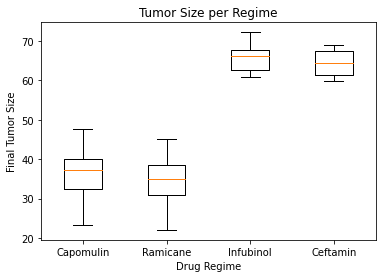

In [14]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Size per Regime")
ax1.set_ylabel("Final Tumor Size")
ax1.set_xlabel("Drug Regime")
ax1.set_xticklabels(["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show(ax1.boxplot([capDrugs,ramDrugs,infDrugs,cefDrugs]))

No handles with labels found to put in legend.


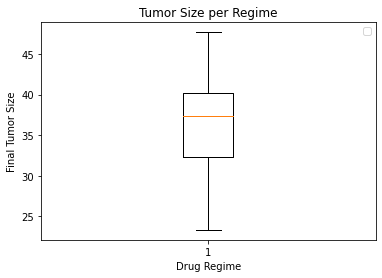

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Size per Regime")
ax1.set_ylabel("Final Tumor Size")
ax1.set_xlabel("Drug Regime")
ax1.boxplot(capDrugs)
ax1.legend()
#plt.show(ax1.boxplot([capDrugs,ramDrugs,infDrugs,cefDrugs]))

In [182]:

capDrugsOnly = cleanMice.loc[cleanMice["Drug Regimen"]=="Capomulin", :]

capDrugsOneMouse=capDrugsOnly.iloc[:10]
capDrugsOneMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume over Time')

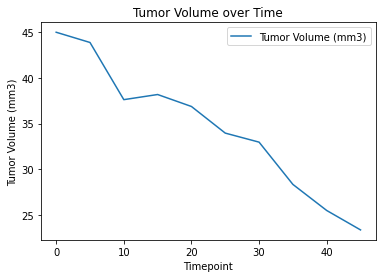

In [191]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


ax2 = capDrugsOneMouse.plot.line(x="Timepoint", y="Tumor Volume (mm3)")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_title("Tumor Volume over Time")







Text(0.5, 1.0, 'Weight vs Tumor Volume')

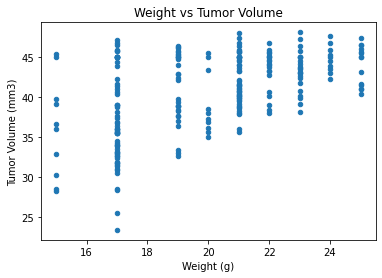

In [193]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ax3 = capDrugsOnly.plot.scatter(x ="Weight (g)" ,y="Tumor Volume (mm3)")
ax3.set_title("Weight vs Tumor Volume")

## Correlation and Regression

Text(20, 25, 'y = 0.96x +21.49')

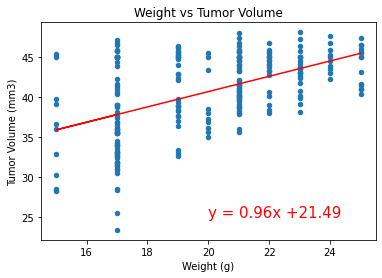

In [205]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
ax4 = capDrugsOnly.plot.scatter(x ="Weight (g)" ,y="Tumor Volume (mm3)")
ax4.set_title("Weight vs Tumor Volume")
x_values=capDrugsOnly["Weight (g)"]
y_values = capDrugsOnly["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

y = 0.96x +21.49
